<a href="https://colab.research.google.com/github/Virajkd/ECE-curriculum-analysis-for-colleges/blob/main/Code_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import networkx as nx
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud
import nltk
from collections import Counter

In [ ]:
file_name = '/content/drive/MyDrive/Crowd_management/ECE_final.xlsx'
df = pd.read_excel(file_name)

In [ ]:
# Load the data from a single Excel sheet
data1 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet1')
data2 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet2')
data3 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet3')
data4 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet4')
data5 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet5')
data6 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet6')
data7 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet7')
data8 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet8')

data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8], ignore_index=True)

In [ ]:
# Load your dataset (adjust the file path as necessary)
'''df = pd.read_csv('syllabi.csv')  # Assuming columns: 'course_name',
'syllabus', 'college_name'''
# Load Spacy English model
nlp = spacy.load("en_core_web_sm")
# Function to preprocess and clean syllabi text
def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Lowercase, remove punctuation, and apply Spacy tokenizer
        doc = nlp(text.lower())
        tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
        return ' '.join(tokens)
    else:
        return ''  # or np.nan, depending on your preference

# Preprocess syllabi
df['cleaned_syllabus'] = df['Subject'].apply(preprocess_text)

# Preview the result
print(df[['Subject', 'cleaned_syllabus']].head())

                                        Subject  \
0                      Engineering Mathematics    
1                         Engineering Chemistry   
2            Introduction to Python Programming   
3      Principles of Electrical and Electronics   
4  Elements of Mechanical and Civil Engineering   

                        cleaned_syllabus  
0                engineering mathematics  
1                  engineering chemistry  
2        introduction python programming  
3      principles electrical electronics  
4  elements mechanical civil engineering  


In [ ]:
# Define expected topics for ECE syllabus (adjust as needed)
expected_topics = [
'digital circuits', 'microprocessors', 'control systems',
'signals and systems', 'electronics', 'communication systems',
'machine learning', 'embedded systems', 'vlsi', 'power systems'
]
# Create tokens list for LDA
texts = [text.split() for text in df['cleaned_syllabus']]
# Create a dictionary and a corpus needed for LDA
dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

# Perform LDA topic modeling
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary,
passes=15)
# Display topics
print("Topics from LDA:")
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

Topics from LDA:
(0, '0.134*"programming" + 0.108*"idea" + 0.082*"c" + 0.057*"development" + 0.057*"evaluation" + 0.057*"practical" + 0.057*"application" + 0.057*"introduction" + 0.057*"python" + 0.031*"hdl"')
(1, '0.055*"health" + 0.055*"foundations" + 0.055*"yoga" + 0.055*"practice" + 0.055*"scientific" + 0.055*"kannada/" + 0.055*"samskrutika" + 0.055*"balake" + 0.055*"kannada" + 0.055*"physical"')
(2, '0.087*"solving" + 0.087*"problem" + 0.087*"culture" + 0.087*"chemistry" + 0.015*"engineering" + 0.015*"electrical" + 0.015*"principles" + 0.015*"electronics" + 0.014*"economics" + 0.014*"course"')
(3, '0.234*"engineering" + 0.136*"mathematics" + 0.071*"semiconductors" + 0.071*"physics" + 0.039*"course" + 0.039*"elements" + 0.039*"mechanical" + 0.039*"civil" + 0.039*"science" + 0.039*"economics"')
(4, '0.128*"principles" + 0.128*"electrical" + 0.128*"electronics" + 0.067*"biology" + 0.067*"communicative" + 0.067*"engineers" + 0.067*"english-" + 0.037*"technology" + 0.037*"emerging" + 0

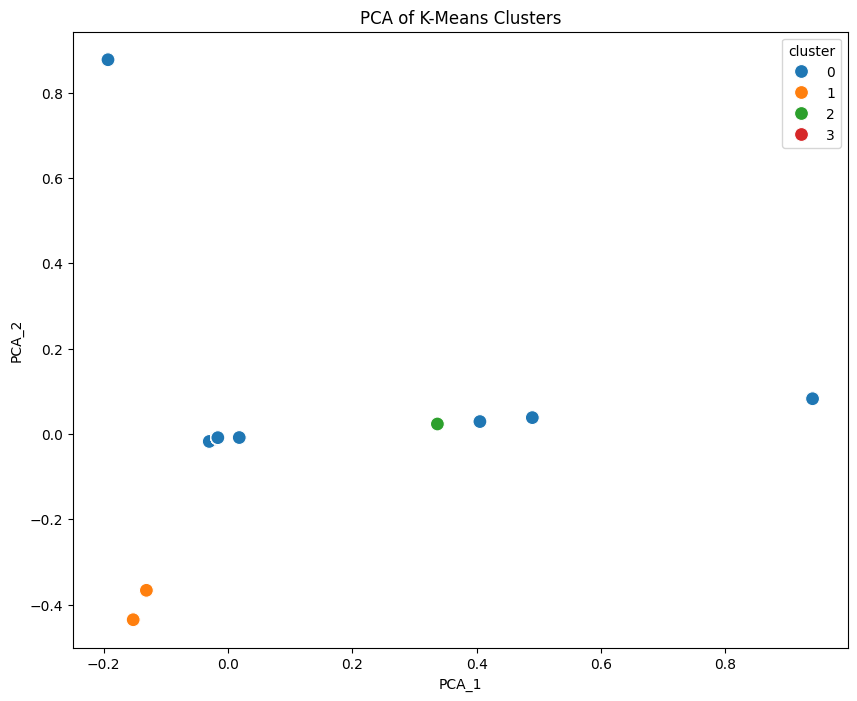

In [ ]:
# Vectorize the syllabi using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['cleaned_syllabus'])
# Perform KMeans clustering (let's assume 4 clusters for 4 colleges)
num_clusters = 4
km = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = km.fit_predict(X)
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
df['PCA_1'] = X_pca[:, 0]
df['PCA_2'] = X_pca[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster', data=df, palette='tab10', s=100)
plt.title('PCA of K-Means Clusters')
plt.show()

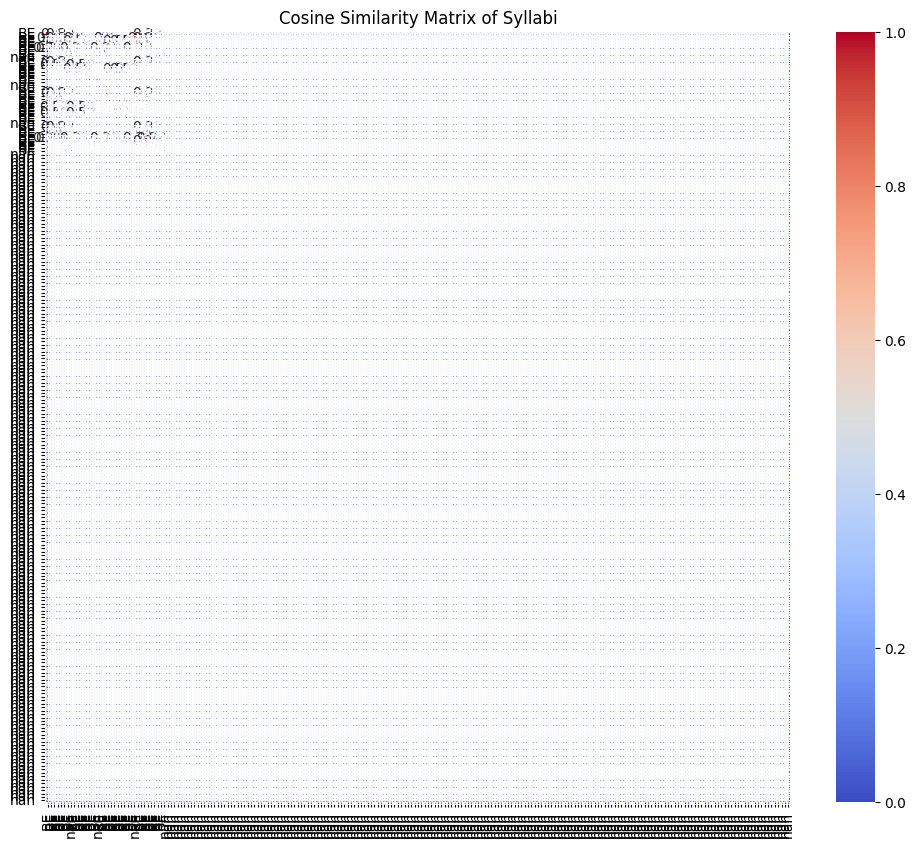

In [ ]:
# Compute cosine similarity between syllabi
cosine_sim = cosine_similarity(X)
# Visualize the cosine similarity matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim, annot=True, cmap='coolwarm',
xticklabels=df['Course Type'], yticklabels=df['Course Type'])
plt.title('Cosine Similarity Matrix of Syllabi')
plt.show()

Columns in df: Index(['Course Type', 'Branch', 'Sem', 'Subject', 'Credit Points',
       'Core/Prof Elective', 'Prerequisite course',
       'Modules/Units in SylPracticalus', 'Practical/Theory', 'Offered by',
       'year', 'cleaned_syllabus', 'cluster', 'PCA_1', 'PCA_2'],
      dtype='object')


<ipython-input-27-4e11a9357b1b>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_topics = gap_df.applymap(lambda x: 1 if x == 0 else 0)


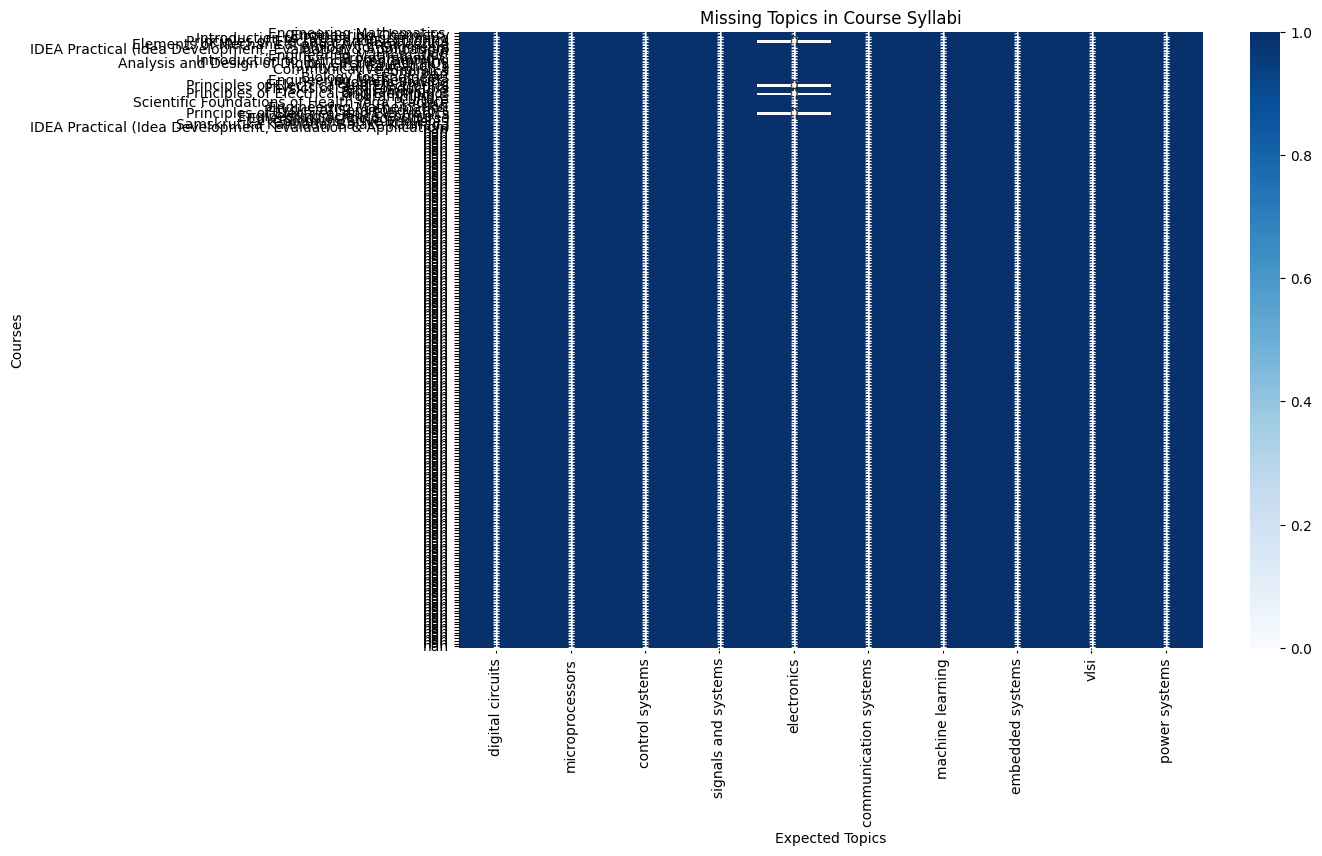

In [ ]:
# Check for the presence of 'Offered_by' column
print("Columns in df:", df.columns)

# Create a DataFrame to store presence/absence of expected topics
vectorizer_gap = TfidfVectorizer(stop_words='english', vocabulary=expected_topics)
X_gap = vectorizer_gap.fit_transform(df['cleaned_syllabus'])

# Create DataFrame for the gap analysis (1 for missing, 0 for present)
gap_df = pd.DataFrame(X_gap.toarray(), columns=vectorizer_gap.get_feature_names_out())

# Flag missing topics (1 if the topic is missing)
missing_topics = gap_df.applymap(lambda x: 1 if x == 0 else 0)

# Check and add 'Subject' and 'Offered_by' columns if they exist in df
if 'Subject' in df.columns:
    missing_topics['Subject'] = df['Subject']
else:
    print("Warning: 'Subject' column not found in df")

if 'Offered by' in df.columns:
    missing_topics['Offered by'] = df['Offered by']
else:
    print("Warning: 'Offered by' column not found in df")

# Visualize the missing topics with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    missing_topics.iloc[:, :-2],
    annot=True, cmap='Blues',
    xticklabels=expected_topics,
    yticklabels=missing_topics['Subject'] if 'Subject' in missing_topics.columns else missing_topics.index
)
plt.title('Missing Topics in Course Syllabi')
plt.xlabel('Expected Topics')
plt.ylabel('Courses')
plt.show()

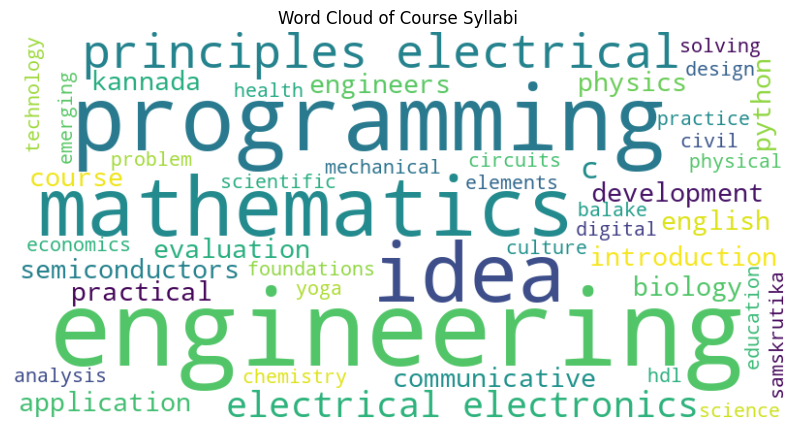

In [ ]:
# Combine all syllabi into a single text
all_syllabi = ' '.join(df['cleaned_syllabus'])
# Generate word cloud for most frequent terms across all syllabi
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(all_syllabi)
# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Course Syllabi')
plt.show()

In [ ]:
# Summarize the findings:
# 1. Topics found from LDA
# 2. Cluster assignments (KMeans)
# 3. Missing topics (Gap Analysis)
print("Topic Modeling (LDA) Results:")
for topic in topics:
    print(topic)
# Print cluster assignments for each course
print("\nCluster Assignments (KMeans):")
for index, row in df.iterrows():
  print(f"Course: {row['Subject']} - Cluster: {row['cluster']}")
# Count missing topics for each course
  missing_topic_counts = missing_topics.drop(columns=['Subject', 'Offered by']).sum(axis=1)
df['missing_topic_count'] = missing_topic_counts
print("\nMissing Topics per Course:")
print(df[['Subject', 'missing_topic_count']])

Topic Modeling (LDA) Results:
(0, '0.134*"programming" + 0.108*"idea" + 0.082*"c" + 0.057*"development" + 0.057*"evaluation" + 0.057*"practical" + 0.057*"application" + 0.057*"introduction" + 0.057*"python" + 0.031*"hdl"')
(1, '0.055*"health" + 0.055*"foundations" + 0.055*"yoga" + 0.055*"practice" + 0.055*"scientific" + 0.055*"kannada/" + 0.055*"samskrutika" + 0.055*"balake" + 0.055*"kannada" + 0.055*"physical"')
(2, '0.087*"solving" + 0.087*"problem" + 0.087*"culture" + 0.087*"chemistry" + 0.015*"engineering" + 0.015*"electrical" + 0.015*"principles" + 0.015*"electronics" + 0.014*"economics" + 0.014*"course"')
(3, '0.234*"engineering" + 0.136*"mathematics" + 0.071*"semiconductors" + 0.071*"physics" + 0.039*"course" + 0.039*"elements" + 0.039*"mechanical" + 0.039*"civil" + 0.039*"science" + 0.039*"economics"')
(4, '0.128*"principles" + 0.128*"electrical" + 0.128*"electronics" + 0.067*"biology" + 0.067*"communicative" + 0.067*"engineers" + 0.067*"english-" + 0.037*"technology" + 0.037*"

In [ ]:
college_similarity = cosine_similarity(X)  # Cosine similarity matrix between syllabi
df['avg_similarity'] = college_similarity.mean(axis=1)
# Compute the average similarity for each college
college_avg_similarity = df.groupby('Offered by')['avg_similarity'].mean()
print("\nAverage Syllabi Similarity per College:")
print(college_avg_similarity)


Average Syllabi Similarity per College:
Offered by
Amrita    0.012598
IIITB     0.011286
RV        0.010184
Reva      0.014242
Name: avg_similarity, dtype: float64


In [ ]:
!pip install bertopic
from bertopic import BERTopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
# Assuming 'df['cleaned_syllabus']' contains the preprocessed syllabi
model = BERTopic()
topics, probs = model.fit_transform(df['cleaned_syllabus'])
# Display topics
print("Topics from BERTopic:")
for i, topic in enumerate(model.get_topics()):
  print(f"Topic {i}: {topic}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Topics from BERTopic:
Topic 0: 0
Topic 1: 1


In [ ]:
df['year'] = pd.to_datetime(df['date']).dt.year  # Assuming you have a 'date' column
topics_over_time = pd.DataFrame(index=range(df['year'].min(),
df['year'].max() + 1))
# Analyze the prevalence of topics over time
for topic in expected_topics:
   topics_over_time[topic] = df[df['cleaned_syllabus'].str.contains(topic, na=False)].groupby('year').size()
topics_over_time.plot(figsize=(12, 6))
plt.title('Topic Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Courses Covering Topic')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

KeyError: 'date'

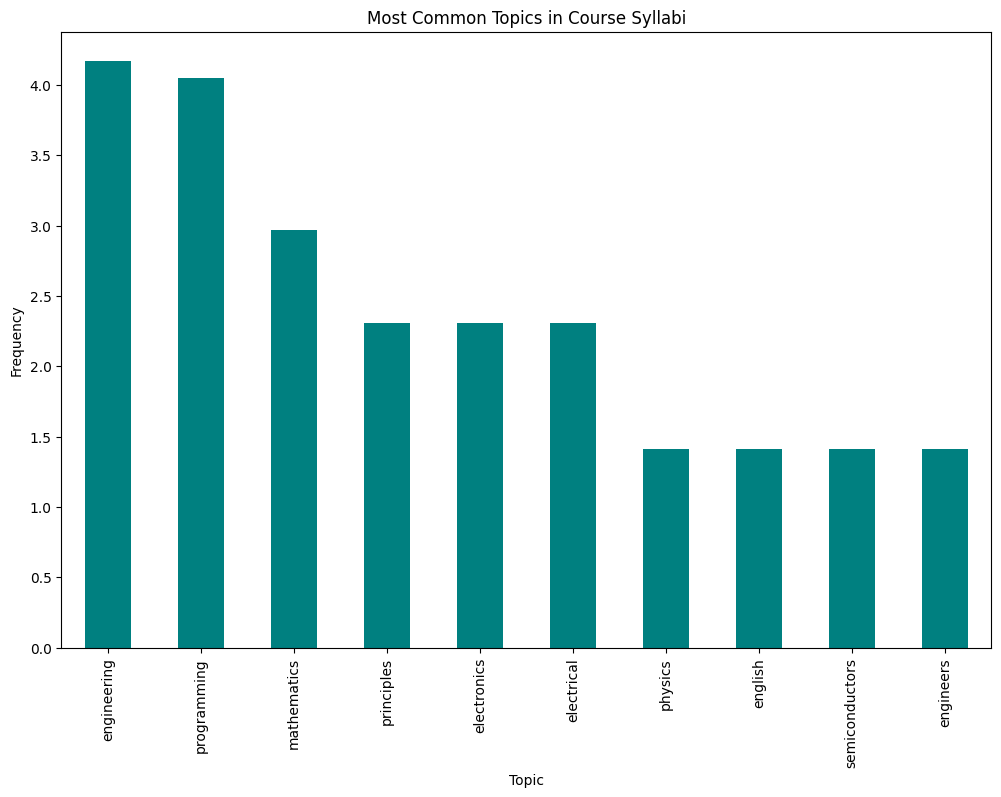

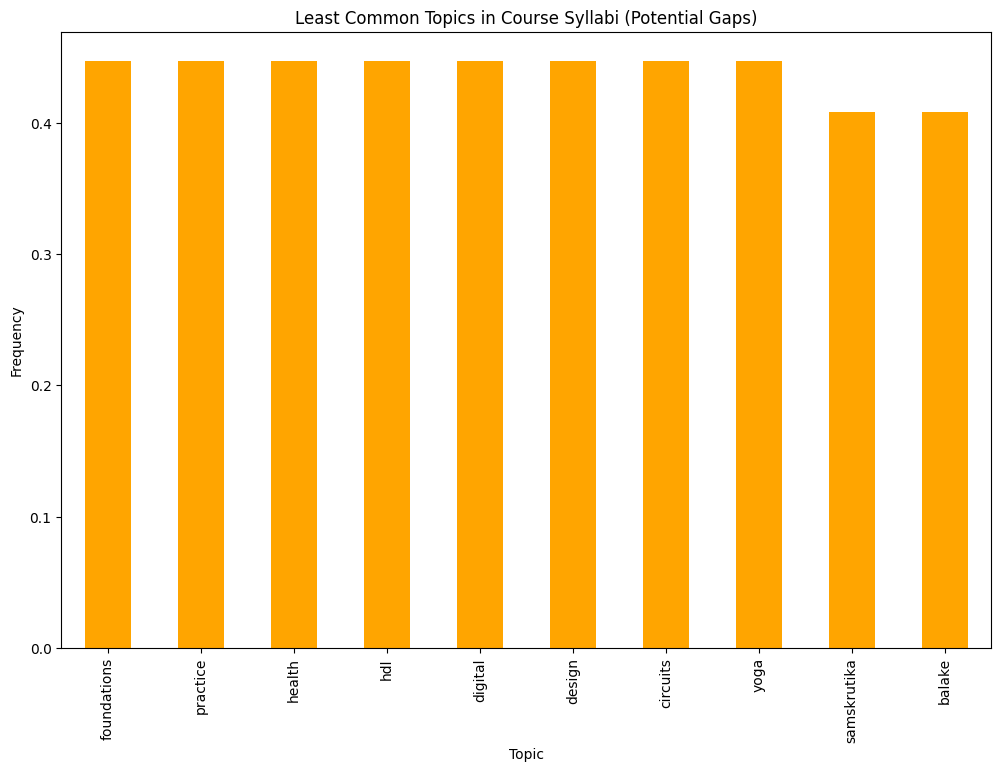

In [ ]:
# Measure frequency of each expected topic across syllabi
topic_frequencies = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out()).sum(axis=0)
topic_frequencies = pd.Series(topic_frequencies,index=vectorizer.get_feature_names_out()).sort_values(ascending=False)
# Visualize the most and least common topics
plt.figure(figsize=(12, 8))
topic_frequencies.head(10).plot(kind='bar', color='teal')
plt.title('Most Common Topics in Course Syllabi')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()
# Least common topics (possible gap areas)
plt.figure(figsize=(12, 8))
topic_frequencies.tail(10).plot(kind='bar', color='orange')
plt.title('Least Common Topics in Course Syllabi (Potential Gaps)')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Measure depth of coverage for each topic
topic_depth = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out()).sum(axis=1)
df['topic_depth'] = topic_depth
# Sort courses by topic depth
sorted_courses = df[['Subject', 'topic_depth']].sort_values(by='topic_depth', ascending=False)
print(sorted_courses.head())

                                              Subject  topic_depth
11   Analysis and Design of Digital Circuits with HDL     2.236068
25     Scientific Foundations of Health-Yoga Practice     2.236068
34  IDEA Practical (Idea Development, Evaluation &...     2.121320
6   IDEA Practical (Idea Development, Evaluation &...     2.121320
4        Elements of Mechanical and Civil Engineering     1.987629


In [ ]:
import pandas as pd
# Example SLOs for different courses (you may load this from a CSV)
slo_data = {
'course_name': ['Course 1', 'Course 2', 'Course 3'],
'SLO1': ['signal processing', 'control systems', 'digital electronics'],
'SLO2': ['control systems', 'signals and systems', 'machine learning'],
'SLO3': ['embedded systems', 'microprocessors', 'data analysis'],
'SLO4': ['microprocessors', 'machine learning', 'embedded systems'],
'SLO5': ['embedded systems', 'AI', 'vlsi design']
}
# Create a DataFrame
slo_df = pd.DataFrame(slo_data)
print(slo_df)

  course_name                 SLO1                 SLO2              SLO3  \
0    Course 1    signal processing      control systems  embedded systems   
1    Course 2      control systems  signals and systems   microprocessors   
2    Course 3  digital electronics     machine learning     data analysis   

               SLO4              SLO5  
0   microprocessors  embedded systems  
1  machine learning                AI  
2  embedded systems       vlsi design  


In [ ]:
import pandas as pd
import spacy

# Load spacy model for text preprocessing
nlp = spacy.load("en_core_web_sm")

# Function to preprocess the syllabus text
def preprocess_text(text):
    doc = nlp(text.lower())  # Convert to lowercase and tokenize
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

# Sample syllabi data (for illustration)
df_syllabi = pd.DataFrame({
    'Subject': ['Course 1', 'Course 2', 'Course 3'],
    'syllabus': [
        'Introduction to signal processing, digital circuits, control systems.',
        'Control systems and signals, microprocessors, machine learning basics.',
        'Embedded systems, microprocessors, VLSI design, data analysis.'
    ]
})

# Preprocess the syllabi
df_syllabi['cleaned_syllabus'] = df_syllabi['syllabus'].apply(preprocess_text)

# Print the relevant columns
print(df_syllabi[['Subject', 'cleaned_syllabus']])


    Subject                                   cleaned_syllabus
0  Course 1  introduction signal processing digital circuit...
1  Course 2  control systems signals microprocessors machin...
2  Course 3  embedded systems microprocessors vlsi design d...


In [ ]:
def map_slos_to_syllabus(syllabus, slo_keywords):
  match_score = {}
  for slo, keywords in slo_keywords.items():
  # Simple keyword matching: check if any keyword in SLO is found in
    matches = [keyword for keyword in keywords.split(',') if keyword in syllabus]
    match_score[slo] = len(matches)  # Count the number of matches
    return match_score
# Example SLO keywords for each course (you may have more SLOs)
slo_keywords = {
'SLO1': 'signal processing,digital circuits',
'SLO2': 'control systems,signals and systems',
'SLO3': 'embedded systems,microprocessors',
'SLO4': 'machine learning,data analysis',
'SLO5': 'AI,vlsi design'
}
# Apply the mapping function to each syllabus
df_syllabi['slo_mapping'] = df_syllabi['cleaned_syllabus'].apply(lambda x:
map_slos_to_syllabus(x, slo_keywords))
# Display the results
print(df_syllabi[['syllabus', 'slo_mapping']])

                                            syllabus  slo_mapping
0  Introduction to signal processing, digital cir...  {'SLO1': 2}
1  Control systems and signals, microprocessors, ...  {'SLO1': 0}
2  Embedded systems, microprocessors, VLSI design...  {'SLO1': 0}


In [ ]:
# Generate a summary of missing SLO coverage
def identify_slo_gaps(mapping):
  gaps = {slo: 'Covered' if score > 0 else 'Missing' for slo, score in
  mapping.items()}
  return gaps
df_syllabi['slo_gaps'] = df_syllabi['slo_mapping'].apply(identify_slo_gaps)
# Display the gap analysis for each course
print(df_syllabi[['syllabus', 'slo_gaps']])


                                            syllabus             slo_gaps
0  Introduction to signal processing, digital cir...  {'SLO1': 'Covered'}
1  Control systems and signals, microprocessors, ...  {'SLO1': 'Missing'}
2  Embedded systems, microprocessors, VLSI design...  {'SLO1': 'Missing'}


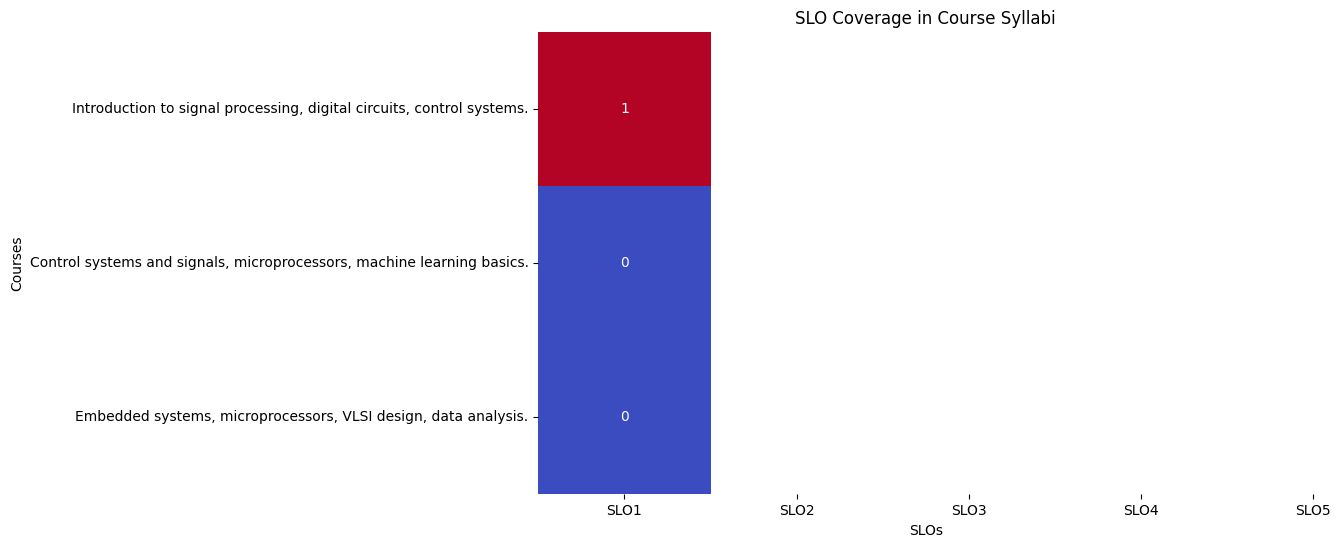

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Convert gap analysis results into a DataFrame
gap_df = pd.DataFrame(df_syllabi['slo_gaps'].tolist(),
index=df_syllabi['syllabus'])
# Visualize the SLO coverage in a heatmap (0 for missing, 1 for covered)
gap_df_numeric = gap_df.applymap(lambda x: 1 if x == 'Covered' else 0)
plt.figure(figsize=(10, 6))
sns.heatmap(gap_df_numeric, annot=True, cmap='coolwarm', cbar=False,
xticklabels=slo_keywords.keys())
plt.title('SLO Coverage in Course Syllabi')
plt.ylabel('Courses')
plt.xlabel('SLOs')
plt.show()